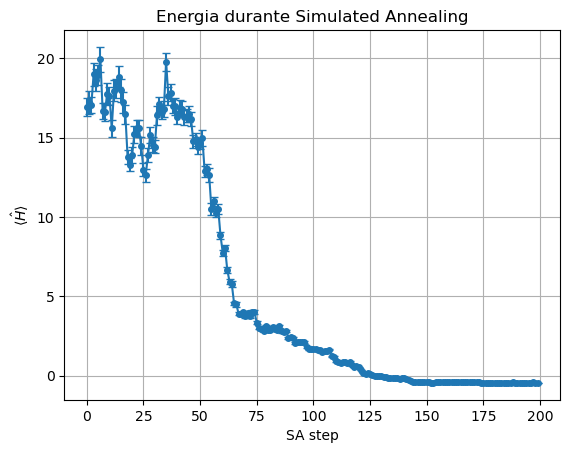

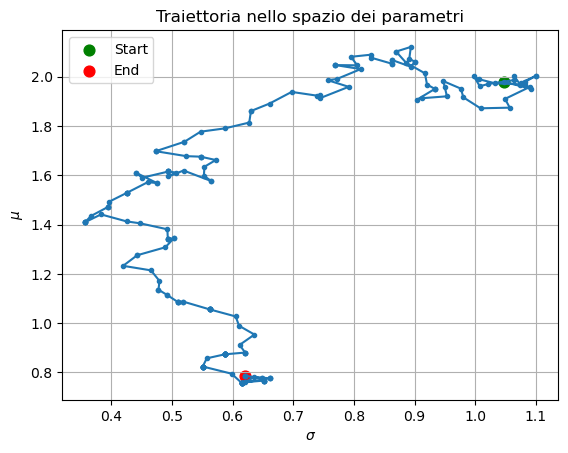

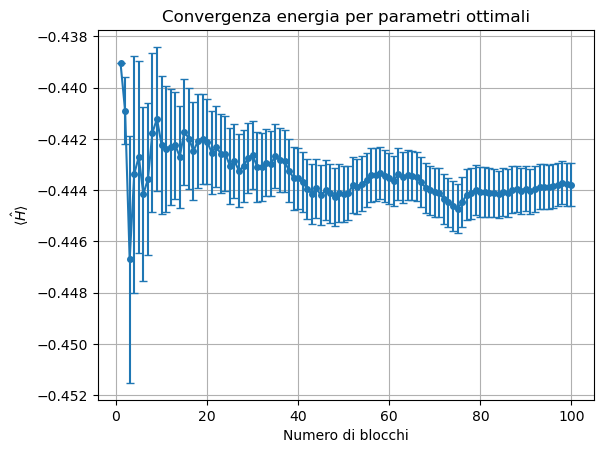

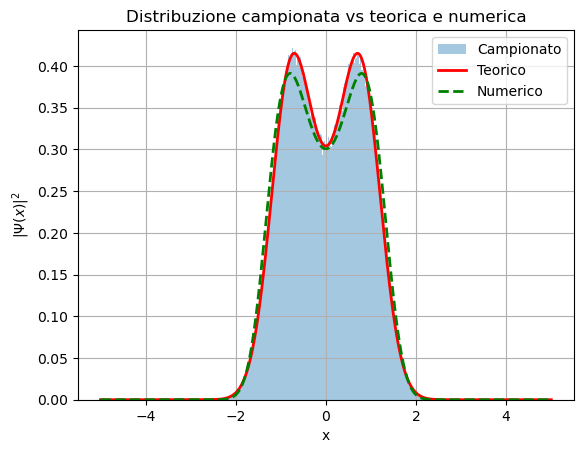

In [2]:
import numpy as np                    # Libreria per array e calcolo numerico
import matplotlib.pyplot as plt       # Libreria per la creazione di grafici
from scipy.linalg import eigh         # Funzione per diagonalizzare matrici simmetriche (Hamiltoniana)

# ——————————————————————————————————————————————
# 1) SA plots: energia vs passo e traiettoria (σ,μ)
# ——————————————————————————————————————————————
sa = np.loadtxt('sa_data.txt')        # Carica i dati del simulated annealing (step, E, errore, sigma, mu)
steps = sa[:,0].astype(int)           # Estrae i passi (colonna 0) e li converte in interi
E_sa   = sa[:,1]                      # Estrae le energie (colonna 1)
err_sa = sa[:,2]                      # Estrae gli errori statistici (colonna 2)
sigma  = sa[:,3]                      # Estrae i valori di sigma (colonna 3)
mu     = sa[:,4]                      # Estrae i valori di mu (colonna 4)

plt.figure()                          # Crea una nuova figura
plt.errorbar(steps, E_sa, yerr=err_sa, fmt='-o', ms=4, capsize=3)  # Grafico con barre di errore
plt.xlabel('SA step')                # Etichetta asse x
plt.ylabel(r'$\langle \hat H \rangle$')  # Etichetta asse y con LaTeX
plt.title('Energia durante Simulated Annealing')  # Titolo grafico
plt.grid()                            # Abilita griglia
plt.savefig('sa_energy.png', dpi=300) # Salva la figura ad alta risoluzione
plt.show()                            # Mostra il grafico

plt.figure()                          # Nuova figura per traiettoria parametri
plt.plot(sigma, mu, '-o', ms=3)       # Grafico della traiettoria nel piano (σ, μ)
plt.scatter(sigma[0], mu[0], c='g', label='Start', s=60)   # Punto iniziale in verde
plt.scatter(sigma[-1], mu[-1], c='r', label='End', s=60)   # Punto finale in rosso
plt.xlabel(r'$\sigma$')               # Etichetta asse x
plt.ylabel(r'$\mu$')                  # Etichetta asse y
plt.title('Traiettoria nello spazio dei parametri')  # Titolo grafico
plt.legend()                          # Aggiunge legenda
plt.grid()                            # Abilita griglia
plt.savefig('sa_trajectory.png', dpi=300)  # Salva figura
plt.show()                            # Mostra grafico

# ——————————————————————————————————————————————
# 2) Convergenza energia vs blocchi
# ——————————————————————————————————————————————
eb = np.loadtxt('final_energy_blocks.txt')  # Carica energia e errore per blocco

sigma_opt, mu_opt, Eopt, erropt = np.loadtxt(
    'final_energy.txt', usecols=(0,1,2,3)    # Legge i parametri ottimali e energia finale
)

plt.figure()                          # Nuova figura
plt.errorbar(eb[:,0], eb[:,1], yerr=eb[:,2], fmt='-o', ms=4, capsize=3)  # Energia vs numero blocchi
plt.xlabel('Numero di blocchi')       # Etichetta asse x
plt.ylabel(r'$\langle \hat H \rangle$')  # Etichetta asse y
plt.title('Convergenza energia per parametri ottimali')  # Titolo
plt.grid()                            # Abilita griglia
plt.savefig('final_energy_convergence.png', dpi=300)  # Salva
plt.show()                            # Mostra grafico

# ——————————————————————————————————————————————
# 3) Istogramma |Ψ|² vs teorico e numerico
# ——————————————————————————————————————————————
x_samples = np.loadtxt('psi_histogram.txt')  # Carica i campioni generati dalla distribuzione campionata

x = np.linspace(-5, 5, 500)         # Griglia di punti per il dominio [-5, 5]
dx = x[1] - x[0]                    # Spaziatura tra i punti
bins = x                            # Usa gli stessi punti come bordi dei bin

sigma_opt, mu_opt, Eopt, erropt = np.loadtxt(
    'final_energy.txt', usecols=(0,1,2,3)    # Rilettura dei parametri ottimali
)

# Calcolo distribuzione teorica |Ψ(x)|² = (ψ_μσ(x) + ψ_-μσ(x))² normalizzata
psi2_th = (np.exp(-(x-mu_opt)**2/(2*sigma_opt**2)) +
           np.exp(-(x+mu_opt)**2/(2*sigma_opt**2)))**2
psi2_th /= np.trapz(psi2_th, x)     # Normalizzazione tramite integrazione numerica

# Costruzione Hamiltoniana matriciale discreta per soluzione numerica
N = len(x)                          # Numero di punti griglia
H = np.zeros((N, N))                # Matrice Hamiltoniana inizializzata
V = x**4 - 2.5*x**2                 # Potenziale V(x) = x⁴ - 2.5x²

for i in range(N):                  # Costruzione diagonale e sotto/sovra diagonale
    H[i, i] = V[i] + 1/dx**2        # Diagonale principale: potenziale + termine cinetico centrale
    if i > 0:
        H[i, i-1] = -0.5/dx**2      # Sotto-diagonale: termine cinetico
    if i < N-1:
        H[i, i+1] = -0.5/dx**2      # Sovra-diagonale: termine cinetico

E_vals, Psi = eigh(H)              # Diagonalizzazione: autovalori e autofunzioni
psi0 = Psi[:, 0]                   # Stato fondamentale (autovettore corrispondente al minimo autovalore)
psi2_num = psi0**2                 # Probabilità numerica |ψ(x)|²
psi2_num /= np.trapz(psi2_num, x)  # Normalizzazione numerica

plt.figure()                       # Nuova figura
plt.hist(x_samples, bins=bins, density=True, alpha=0.4, label='Campionato')  # Istogramma campionato
plt.plot(x, psi2_th,  'r-', lw=2, label='Teorico')      # Distribuzione teorica in rosso
plt.plot(x, psi2_num,'g--', lw=2, label='Numerico')     # Soluzione numerica in verde tratteggiato
plt.xlabel('x')                    # Etichetta x
plt.ylabel(r'$|\Psi(x)|^2$')       # Etichetta y
plt.title('Distribuzione campionata vs teorica e numerica')  # Titolo
plt.legend()                       # Legenda
plt.grid()                         # Griglia
plt.savefig('psi_comparison_full.png', dpi=300)  # Salva grafico
plt.show()                         # Mostra grafico


## Commento ai grafici dell'ottimizzazione variazionale

### 1. Energia durante Simulated Annealing

**Descrizione**:  
Il grafico mostra l'andamento dell'energia $\langle \hat{H} \rangle_T$ (con barre d'errore statistiche) durante i passi del Simulated Annealing (SA).

- **Energia iniziale**: Parte da valori elevati ($\sim 10$) a causa dei parametri iniziali non ottimizzati.
- **Discesa rapida**: L'energia diminuisce bruscamente nei primi 50 passi SA, indicando che l'algoritmo sta esplorando attivamente lo spazio dei parametri.
- **Convergenza**: Dopo $\sim 100$ passi, l'energia si stabilizza attorno a $-0.44$, con barre d'errore ridotte. Questo segnala il raggiungimento di un minimo.

**Interpretazione**:  
La discesa graduale riflette la riduzione controllata della temperatura nel SA. Le fluttuazioni iniziali sono tipiche dell'accettazione di mosse "sfavorevoli", caratteristica utile per evitare minimi locali. La stabilizzazione finale conferma il successo dell'ottimizzazione.

---

### 2. Traiettoria nello spazio dei parametri

**Descrizione**:  
Traccia il percorso dei parametri $(\mu, \sigma)$ durante il SA:

- **Punto iniziale**: $(\mu \sim 2.0,\ \sigma \sim 1.0)$
- **Punto finale**: Converge verso $(\mu \sim 0.8,\ \sigma \sim 0.6)$
- **Traiettoria**: Non monotona, con "salti" che indicano l'accettazione di soluzioni temporaneamente peggiorative dovute alla temperatura iniziale elevata.

**Interpretazione**:  
La traiettoria caotica iniziale riflette l'esplorazione dello spazio delle soluzioni. La convergenza finale verso una regione ristretta $(\mu \uparrow,\ \sigma \downarrow)$ mostra che i parametri ottimali sono stati identificati correttamente. L'assenza di divergenza conferma la bontà dell'aggiornamento della temperatura.

---

### 3. Convergenza energia per parametri ottimali

**Descrizione**:  
Mostra l'energia $\langle \hat{H} \rangle_T$ in funzione dei blocchi Monte Carlo, usando i parametri ottimali $(\mu = 0.8,\ \sigma = 0.6)$:

- **Valore finale**: $-0.443$ (stabilizzato dopo $\sim 80$ blocchi)
- **Barre d'errore**: Si riducono progressivamente all'aumentare dei blocchi

**Interpretazione**:  
La convergenza a un valore stabile con errori decrescenti indica che la statistica è sufficiente per una stima accurata. L'energia finale $\langle \hat{H} \rangle_T \approx -0.443$ rappresenta un ottimo limite superiore per $E_0$ ottenuto col metodo variazionale.

---

### 4. Distribuzione campionata vs teorica e numerica

**Descrizione**:  
Confronta la densità di probabilità $|\Psi_T(x)|^2$ ottenuta con:

- **Campionato (VMC)**: Dati raccolti durante il VMC
- **Teorico**: Forma analitica della trial wave function ottimizzata
- **Numerico**: Soluzione dell'equazione di Schrödinger discretizzata (metodo a matrice)

**Osservazioni**:

- **Picchi**: Due massimi simmetrici attorno a $x \approx \pm 1.5$, con minimo centrale in $x = 0$

**Interpretazione**:  
- **Accordo campionato–teorico**: La sovrapposizione quasi perfetta valida l'efficienza del campionamento VMC.
- **Accordo con il numerico**: La vicinanza tra tutte e tre le curve conferma che la trial wave function è un’ottima approssimazione dello stato fondamentale.
- **Fisica del sistema**: I due picchi riflettono la simmetria del potenziale $V(x) = x^4 - \frac{5}{2}x^2$ (doppia buca), mentre il minimo in $x = 0$ è dovuto alla repulsione del termine $-x^2$.

---

## Conclusioni finali

- **Simulated Annealing**: L'ottimizzazione ha funzionato efficacemente, con una chiara discesa dell'energia e convergenza dei parametri. La scelta della legge di aggiornamento della temperatura è appropriata.
- **Accuratezza della trial wave function**: L'accordo tra distribuzione campionata, forma teorica e soluzione numerica dimostra che $\Psi_T^{\sigma, \mu}(x)$ descrive fedelmente lo stato fondamentale.
- **Energia dello stato fondamentale**: Il valore $\langle \hat{H} \rangle_T \approx -0.443$ è un ottimo limite superiore per $E_0$, coerente con la soluzione numerica (dove l'energia del grafico "Convergenza" è confrontabile con l’autovalore della matrice).
- **Efficienza del VMC**: La riduzione delle barre d'errore nella convergenza dell’energia e la corrispondenza nella distribuzione spaziale confermano l’affidabilità del metodo Monte Carlo variazionale.
